In [2]:
import numpy as np
!pip install tensorflow
%pip install matplotlib
import matplotlib.pyplot as pltdrop

%pip install keras
from keras.datasets import mnist

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import h5py

In [4]:
import keras 

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.models import save_model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
def plot_input_img(i):
  plt.imshow(x_train[0] , cmap = 'binary')
  plt.title(y_train[i])
  plt.show()

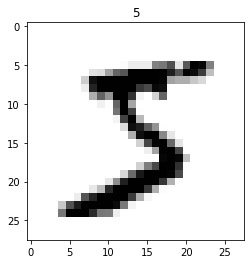

In [8]:
for i in range(1):
  plot_input_img(i)

In [9]:
#processes the image
x_train = x_train.astype(np.float32)/255
x_test = x_train.astype(np.float32)/255

#reshapes the image
x_train = np.expand_dims(x_train, -1)
x_train = np.expand_dims(x_test, -1)

# converts the class
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [3]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation ="softmax"))

NameError: name 'Sequential' is not defined

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics =['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience= 4, verbose= 1)

metric = 'val_accuracy'

mc = ModelCheckpoint("./bestmodel.h5", monitor= "val_accuracy", mode= 'min', valbose= 1, save_best_only= True)

cb = [es,mc]

In [2]:
his = model.fit(x_train, y_train, epochs=10, validation_split= 0.3, callbacks= cb)
model.save('bestmodel.h5')

NameError: name 'model' is not defined

In [15]:
model.save('bestmodel.h5')

In [16]:
!pip install pygame

In [1]:
import pygame, sys
from pygame.locals import *
import numpy as np
from keras.models import load_model
import cv2

WINDOWSIZEX = 640
WINDOWSIZEY = 480

BOUNDRYINC = 5
WHITE = (255,255,255)
BLACK = (0,0,0)
RED = (255,0,0)
IMAGESAVE = False

MODEL = load_model("bestmodel.h5")

LABELS = {0: "Zero", 1:"One", 2: "Two", 3:"Three", 4:"Four", 5:"Five", 6:"Six", 7:"Seven", 8:"Eight", 9:"Nine"}

pygame.init()

FONT = pygame.font.SysFont("comicsansms", 18)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))

pygame.display.set_caption("Board")

iswriting = False
number_xcord = []
number_ycord = []

image_cnt = 1

PREDICT = True

while True:

    for event in pygame.event.get():
        if event.type == QUIT:
            pygame.quit()
            sys.exit()

        if event.type ==MOUSEMOTION and iswriting:
            xcord, ycord = event.pos
            pygame.draw.circle(DISPLAYSURF, WHITE, (xcord,ycord), 4,0 )

            number_xcord.append(xcord)
            number_ycord.append(ycord)
        if event.type == MOUSEBUTTONDOWN:
            iswriting = True

        if event.type == MOUSEBUTTONUP:
            iswriting = False
            number_xcord = sorted(number_xcord)
            number_ycord = sorted(number_ycord)

            rect_min_x , rect_max_x = max(number_xcord[0]-BOUNDRYINC, 0), min(WINDOWSIZEX, number_xcord[-1]+BOUNDRYINC)
            rect_min_y, rect_max_y = max(number_ycord[0]-BOUNDRYINC, 0 ), min(number_ycord[-1]+BOUNDRYINC, WINDOWSIZEX)

            

            number_xcord = []
            number_ycord = []

            img_arr = np.array(pygame.PixelArray(DISPLAYSURF)) [rect_min_x:rect_max_x, rect_min_y:rect_max_y].T.astype(np.float32)

            if IMAGESAVE:
                cv2.imwrite("image.png")
                image_cnt +=1

            if PREDICT:
                image = cv2.resize(img_arr, (28,28))
                image = np.pad(image, (10,10), 'constant', constant_values = 0)
                image = cv2.resize(image, (28,28))/255

                label = str(LABELS[np.argmax(MODEL.predict(image.reshape(1,28,28,1)))])

                textSurface = FONT.render(label, True, RED, WHITE)
                textRecObj = textSurface.get_rect()
                textRecObj.left, textRecObj.bottom = rect_min_x, rect_max_y

                DISPLAYSURF.blit(textSurface, textRecObj)

            if event.type == KEYDOWN:
                if event.unicode == "n":
                    DISPLAYSURF.fill(BLACK)

        pygame.display.update()


pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

C:\Users\leden\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
